In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from IPython.display import display, HTML

import warnings 
warnings.simplefilter("ignore")

# Введение в моделирование по методу Монте-Карло

Аналитикам данных часто требуется точно оценить вероятность неопределенных событий. Например, какова вероятность того, что денежные потоки для нового продукта будут демонстрировать положительную чистую приведенную стоимость (ЧПС)? Каков фактор риска инвестиционного портфеля? Метод Монте-Карло позволяет моделировать ситуации, проявляющие неопределенность, и затем воспроизводить их на компьютере тысячи раз.

>Термин "моделирование по методу Монте-Карло" пришел из моделирования на вычислительных машинах, выполнявшегося в 1930-х и 1940-х годах для оценки вероятности успешной цепной реакции, необходимой для взрыва атомной бомбы. Физики, принимавшие участие в этих работах, были большими поклонниками азартных игр, поэтому метод моделирования получил кодовое название Монте-Карло.

### Где применяется моделирование по методу Монте-Карло?
Во многих компаниях моделирование по методу Монте-Карло является важной частью процесса принятия решений. 

- Компания General Motors, например, моделирует для корпорации прогноз по чистой прибыли, по структурным затратам и затратам на приобретение, а также по чувствительности к различным видам риска (таким как изменения процентных ставок и колебания обменного курса).
- Компания Lilly с помощью моделирования определяет оптимальную производственную мощность для каждого лекарственного препарата.
- Компания Proctor&Gamble с помощью метода Монте-Карло моделирует и оптимально хеджирует валютные риски.
- Компания Sears с помощью моделирования определяет, сколько единиц продукции из каждой товарной линии необходимо заказать у поставщиков, например, количество брюк Dockers на этот год.
- Нефтяные и фармацевтические компании моделируют оценку реальных возможностей, например, оценку возможности расширения, заключения сделки или отсрочки проекта.
- Специалисты по финансовому планированию с помощью моделирования по методу Монте-Карло определяют оптимальные инвестиционные стратегии для выхода на пенсию своих клиентов.

***
Автодилер считает, что спрос на модели 2015 г. распределяется по нормальному закону со средним значением 200 и стандартным отклонением 30. Он получает Envoy за 25 000 долларов и продает за 40 000 долларов. Половину автомобилей, не проданных по полной цене, можно продать по 30 000 долларов. Дилер рассматривает варианты заказа на 200, 220, 240, 269, 280 или 300 штук. Сколько автомобилей он должен заказать?

In [3]:
from scipy.stats import norm

In [39]:
np.random.seed(223)
mean, sigma = 200, 30
demand = norm.ppf(np.random.rand(), mean, sigma)

226.93754957603227

In [22]:
unit_cost = 25000
selling_price = 40000
order_quantity = 240
salvage_value = 30000

In [129]:
def dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand):

    order_cost = unit_cost * order_quantity
    sales_revenue = min(order_quantity, demand) * selling_price
    salvage_revenue = 0.5 * max(0, order_quantity - demand) * salvage_value
    profit = sales_revenue + salvage_revenue - order_cost
    return profit

In [130]:
dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)

975000.0

In [124]:
demand_simulations = norm.rvs(mean, sigma, size=1000) #np.around(np.random.normal(mean, sigma, 1000))

In [50]:
order_values = range(200, 320, 20)

In [131]:
simulations = []
for order_quantity in order_values:
        simulation = pd.Series([dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)
                                          for demand in demand_simulations])
        simulations.append(simulation)

In [132]:
profit_sim = pd.concat(simulations, axis=1)
profit_sim.columns = list(order_values)

In [133]:
profit_sim.describe()

,200,220,240,260,280,300
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.679017e+06,2.659704e+06,2.539652e+06,2.365853e+06,2.171671e+06,1.972288e+06
std,4.658315e+05,6.170832e+05,7.144858e+05,7.585764e+05,7.715531e+05,7.732465e+05
min,7.016339e+05,5.016339e+05,3.016339e+05,1.016339e+05,-9.836610e+04,-2.983661e+05
25%,2.478169e+06,2.278169e+06,2.078169e+06,1.878169e+06,1.678169e+06,1.478169e+06
50%,2.973209e+06,2.773209e+06,2.573209e+06,2.373209e+06,2.173209e+06,1.973209e+06
75%,3.000000e+06,3.293332e+06,3.093332e+06,2.893332e+06,2.693332e+06,2.493332e+06
max,3.000000e+06,3.300000e+06,3.600000e+06,3.900000e+06,4.200000e+06,4.250365e+06


У 200 меньше риска (меньше стандартное отклонение), поэтому лучше заказать 200 машин. Похоже, 200 или 220 — два лучших варианта

***
Небольшой супермаркет пытается определить, сколько экземпляров журнала "People" необходимо заказывать каждую неделю. Владелец считает, что спрос на журнал соответствует дискретной случайной величине

|Спрос|Вероятность|
|--|--|
|15|0.10|
|20|0.20|
|25|0.30|
|30|0.25|
|35|0.15|

Супермаркет платит за каждый экземпляр журнала 1,00 доллар и продает его за 1,95. Каждый непроданный экземпляр может быть возвращен за 0,50 доллара. Сколько экземпляров журнала еженедельно должен заказывать магазин?

In [160]:
demands = pd.DataFrame({
    'prob': (prob:= [.0, .1, .2, .3, .25, .15])[1:],
    'cum prob': np.cumsum(prob)[:-1],
    'demand': range(15, 40, 5)
})
demands

,prob,cum prob,demand
0,0.10,0.00,15
1,0.20,0.10,20
2,0.30,0.30,25
3,0.25,0.60,30
4,0.15,0.85,35


In [205]:
order_quantity = 30
unit_cost = 1
selling_price = 1.95
salvage_value = 0.5

In [365]:
demands[demands['cum prob'] >= min(np.random.random(), 0.85)]['demand'].iloc[0]

30

In [169]:
def shop_profit(unit_cost, selling_price, order_quantity, salvage_value, demand):

    order_cost = unit_cost * order_quantity
    sales_revenue = min(order_quantity, demand) * selling_price
    salvage_revenue = max(0, order_quantity - demand) * salvage_value
    profit = sales_revenue + salvage_revenue - order_cost
    return profit

In [383]:
profit_sim = []

for order_quantity in demands.demand:
    simulations = []
    
    for _ in range(1000): 
        demand = demands[demands['cum prob'] >= min(np.random.random(), 0.85)]['demand'].iloc[0]
        profit = shop_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)
        simulations.append(profit)
    
    profit_sim.append(simulations)                                                     

In [432]:
# получить сразу 1000 значений demand согласно установленному распределению
np.random.choice(demands.demand, size=1000, p=demands.prob)

array([25, 15, 20, 25, 25, 30, 35, 15, 25, 25, 30, 15, 35, 15, 30, 20, 20,
       30, 15, 15, 35, 30, 30, 35, 30, 20, 30, 25, 20, 35, 30, 30, 15, 30,
       25, 25, 25, 35, 25, 25, 30, 20, 35, 25, 15, 15, 15, 30, 25, 35, 20,
       25, 25, 25, 20, 35, 30, 30, 15, 30, 20, 35, 25, 25, 15, 25, 25, 30,
       15, 20, 25, 20, 30, 30, 35, 25, 20, 30, 25, 30, 25, 35, 35, 20, 30,
       25, 25, 25, 25, 30, 25, 35, 25, 15, 20, 25, 30, 20, 30, 15, 30, 35,
       35, 20, 25, 25, 25, 35, 30, 30, 35, 20, 25, 25, 25, 30, 25, 15, 15,
       25, 25, 20, 25, 25, 30, 20, 15, 30, 25, 25, 25, 30, 35, 20, 30, 30,
       20, 35, 35, 30, 35, 20, 35, 20, 15, 15, 25, 25, 35, 35, 30, 15, 30,
       30, 35, 30, 35, 25, 35, 25, 30, 25, 20, 25, 25, 30, 25, 35, 20, 25,
       20, 30, 35, 25, 35, 15, 35, 30, 25, 20, 35, 30, 20, 20, 30, 30, 20,
       25, 30, 15, 30, 35, 20, 25, 25, 25, 25, 30, 30, 25, 20, 30, 30, 15,
       30, 25, 30, 35, 30, 30, 25, 15, 30, 15, 30, 20, 25, 35, 20, 25, 35,
       35, 20, 35, 20, 30

In [411]:
profit = pd.DataFrame(profit_sim).T
profit.columns = demands.demand.to_list()

In [415]:
profit.agg(['mean', 'std'])

,15,20,25,30,35
mean,14.25,19.0,23.075750,25.476750,25.942000
std,0.00,0.0,2.106689,4.989267,7.296789


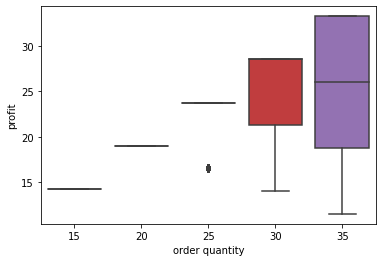

In [423]:
sns.boxplot(x='order quantity', y='profit',
             data=pd.melt(profit, var_name='order quantity', value_name='profit'));

Ожидаемая максимальная выгода при заказе 30 журналов, так как выгода сопоставима с максимально большим заказом — 35 шт. при меньшем риске (стандартное отклонение ниже).

# Вычисление оптимальной цены предложения

При определении цены в борьбе с конкурентами за проект двумя основными источниками неопределенности являются количество конкурентов и цены, предлагаемые каждым конкурентом. При высокой цене предложения можно заработать на проекте много денег, но самих проектов будет мало. При низкой цене предложения проектов будет немало, но денег каждый из них принесет немного. Оптимальная цена предложения находится где-то посередине. Удобным инструментом для определения цены предложения, максимально увеличивающей ожидаемую прибыль, является моделирование по методу Монте-Карло.

### Как определить, должна ли непрерывная случайная величина моделироваться как нормальная случайная величина?

Предположим, что наиболее вероятная цена предложения конкурента составляет 50 000 долларов. Напомним, что кривая плотности нормального распределения вероятностей является симметричной относительно среднего значения. Следовательно, для определения возможности применения нормальной случайной величины в моделировании цены предложения конкурента необходимо проверить симметрию относительно среднего значения цены предложения. Если цена предложения конкурента проявляет симметрию относительно среднего значения 50 000 долларов, цены предложения 40 000 и 60 000, 45 000 и 55 000, и т. д., должны быть приблизительно одинаково вероятны. Если предположение о симметрии кажется логичным, то цену предложения каждого конкурента можно смоделировать как нормальную случайную величину со средним значением 50 000 долларов.

### Как оценить стандартное отклонение цены предложения каждого конкурента? 

Напомним, что согласно эмпирическому правилу, наборы данных с симметричными гистограммами имеют примерно 95% данных в пределах двух стандартных отклонений от среднего значения. Аналогично, нормальная случайная величина с вероятностью 95% находится в пределах двух стандартных отклонений от своего среднего значения. Предположим, что с вероятностью 95% цена предложения конкурента составляет от 30000 до 70000 долларов. Это означает, что 2 × (стандартное отклонение цены предложения конкурента) равно 20 000 долларов или стандартное отклонение цены предложения конкурента равно 10 000 долларов.

### Как с помощью моделирования определить оптимальную цену предложения для проекта строительства?
Предположим, что вы участвуете в тендере на проект строительства, который будет стоить вам 25 000 долларов. Подготовка предложения на получение подряда стоит 1000 долларов. У вас имеется шесть потенциальных конкурентов, и вы подсчитали, что с вероятностью 50% каждый конкурент примет участие в тендере на проект.

Если конкурент подает предложение, то цена его предложения следует закону нормального распределения со средним значением 50 000 долларов и стандартным отклонением 10 000 долларов. Предположим также, что вы подготавливаете предложения только с ценой, кратной 5000 долларов. Какова должна быть цена вашего предложения для получения максимальной ожидаемой прибыли? Напомним, что выигрывает самая низкая цена предложения!

**Ваша стратегия должна быть следующей**
- Сгенерируйте количество конкурентов.
- Для каждого потенциального конкурента, который действительно подает предложение, смоделируйте предложение с помощью нормальной случайной величины. Если потенциальный конкурент не подает предложение, назначьте для него большую цену предложения (например, 100 000 долларов), которая обеспечит ему поражение.
- Определите, является ли цена вашего предложения самой низкой.
- Если вы предлагаете самую низкую цену, то получите прибыль, равную предложению минус стоимость проекта минус 1000 долларов (стоимость подачи предложения). Если цена вашего предложения не самая низкая, то вы теряете 1000 долларов — стоимость подачи предложения.
- Для моделирования каждой возможной цены предложения (например, 30 000, 35 000, ..., 60 000 долларов) тысячу раз используйте таблицу данных с двумя входами и затем выберите цену предложения с наибольшей ожидаемой прибылью.

***
Как изменится оптимальная цена предложения при наличии 12 потенциальных конкурентов?

In [492]:
from scipy.stats import binom

In [480]:
n = 12 # bidders count
mu, sigma = 50000, 10000
cost_project = 25000
cost_bid = 1000
my_bid = 40000
n_bidders = binom.rvs(12, 0.5, np.random.random()) # critbinom

Если предположение о нормальном распределении логично, цену предложения конкурента можно теперь моделировать с помощью формулы `norm.isf(np.random.random(), mu, sigma)`

In [484]:
norm.isf(np.random.random(), mu, sigma) # norminv

47453.92086756208

In [487]:
bids = pd.DataFrame({'bidder': range(1, n+1),
                     'bid': [norm.isf(np.random.random(), mu, sigma)
                                     if i < n_bidders else 100000 for i in range(n)]}) # 100000 is maxbid

In [488]:
bids

,bidder,bid
0,1,42601.183790
1,2,46322.940611
2,3,36425.433603
3,4,47525.321005
4,5,76002.316353
5,6,50702.914443
6,7,18914.495408
7,8,61614.608805
8,9,35087.582454
9,10,40507.245407


In [490]:
my_bid - cost_project - cost_bid if my_bid <= bids.bid.min() else -cost_bid # get profit

-1000

Cимулировние результата участия в тендере методом Монте-Карло

In [550]:
def tender_profit(cost_project, cost_bid, my_bid, bidders_count, bids_range):
    result = dict()
    
    def profit(bid, cost_project, cost_bid, bidders_count):
        min_bid = norm.isf(np.random.random(size=bidders_count), mu, sigma).min()
        return bid - cost_project - cost_bid if bid <= min_bid else -cost_bid
        
    for bid in tqdm(bids_range):
        result[bid] = [profit(bid,
                              cost_project,
                              cost_bid,
                              ) for _ in range(1000)]
    return pd.DataFrame(result)

In [559]:
bids_range = range(30_000, 65_000, 5000) # my bids from 30K to 60K
df = tender_profit(cost_project, cost_bid, my_bid, n_bidders, bids_range)

  0%|          | 0/7 [00:00<?, ?it/s]

In [560]:
df

,30000,35000,40000,45000,50000,55000,60000
0,4000,-1000,-1000,-1000,-1000,-1000,-1000
1,4000,9000,-1000,-1000,-1000,-1000,-1000
2,4000,-1000,-1000,-1000,-1000,-1000,-1000
3,-1000,-1000,14000,-1000,-1000,-1000,-1000
4,4000,-1000,-1000,-1000,-1000,-1000,-1000
...,...,...,...,...,...,...,...
995,4000,-1000,-1000,-1000,-1000,-1000,-1000
996,4000,-1000,14000,19000,-1000,-1000,-1000
997,4000,-1000,-1000,-1000,-1000,-1000,-1000
998,4000,9000,-1000,-1000,-1000,-1000,-1000


In [561]:
df.describe().loc['mean', :] # $35,000 bid maximizes mean profit $3960

30000    2945.0
35000    3960.0
40000    1580.0
45000    -540.0
50000   -1000.0
55000   -1000.0
60000   -1000.0
Name: mean, dtype: float64

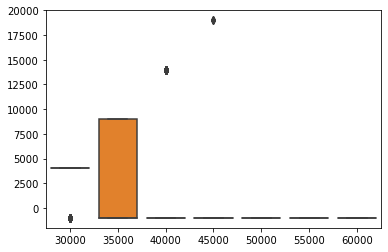

In [555]:
sns.boxplot(data=df);

Ставка в размере 35 000 долларов США максимизирует среднюю прибыль.

***
Предположим, что вы предлагаете цену за нефтяную скважину, которая, по вашей оценке, должна принести 40 млн долларов (включая стоимость разработки и добычи нефти). В торгах участвуют еще три конкурента, и предложение каждого конкурента предположительно соответствует закону нормального распределения со средним значением 30 млн долларов и стандартным отклонением 4 млн долларов. Какое предложение вы должны сделать (с точностью до 1 млн долларов)?